In [1]:
# importing the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from my_modules import helper  # helper package by Allen B. Downey (thinkstats)

In [2]:
# To reload helper package if any edits are made. run this block, only if changes are made to helper module

import importlib
importlib.reload(helper)

<module 'my_modules.helper' from '/home/arjun/Documents/python/tinker/competitive-data-science/04-datahack-2019/notebooks/my_modules/helper.py'>

In [3]:
# setting the parameters

root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (12, 8)
sns.set_style("darkgrid")

---
# 1. Importing the Data

In [4]:
# defining the paths

train_path = os.path.join(root_dir, "data", "train.csv")
test_path = os.path.join(root_dir, "data", "test.csv")
submission_path = os.path.join(root_dir, "data", "sample_submission.csv")

# importing the datasets

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

In [5]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [6]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
submission.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [8]:
# checking the nulls and unique values in the dataset

info_df = pd.DataFrame({
    "uniques": train.nunique(),
    "nulls": train.isnull().sum(),
    "nulls %": train.isnull().sum()%len(train)
    
})

info_df.T

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
uniques,116058,3,19,923,646,140,3,4,92,2,58,221,3,14,216,2,4,5,6,7,8,9,10,10,11,12,13,13,2
nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nulls %,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


From the preliminary data exploration, we can conclude following things:-
- There are no nulls in the data. Hence, no treatment is required on this part.
- ``m13`` is our target variable.
- ``loan_id`` is just a identification variable, adding no information to the dataset. We can conclude this from the fact that all the values of this variable are unique.
---

# 2. Feature Engineering
## 2.1 Univariate Exploration
### 2.1.1 Categorical Variables

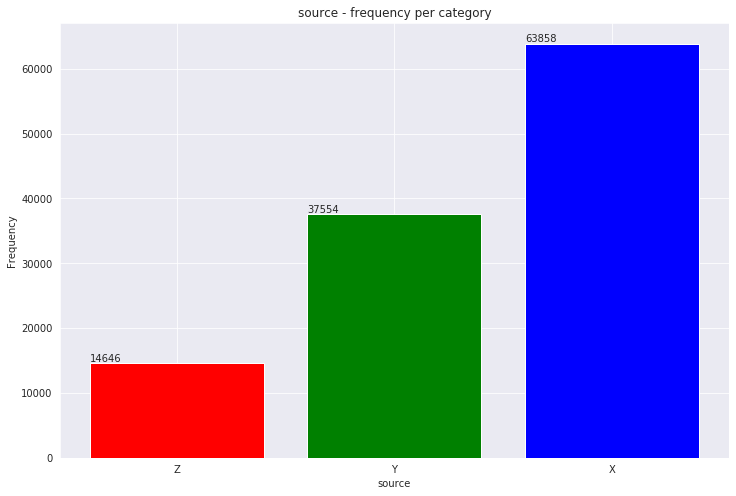

In [9]:
helper.category_freq(train, "source")

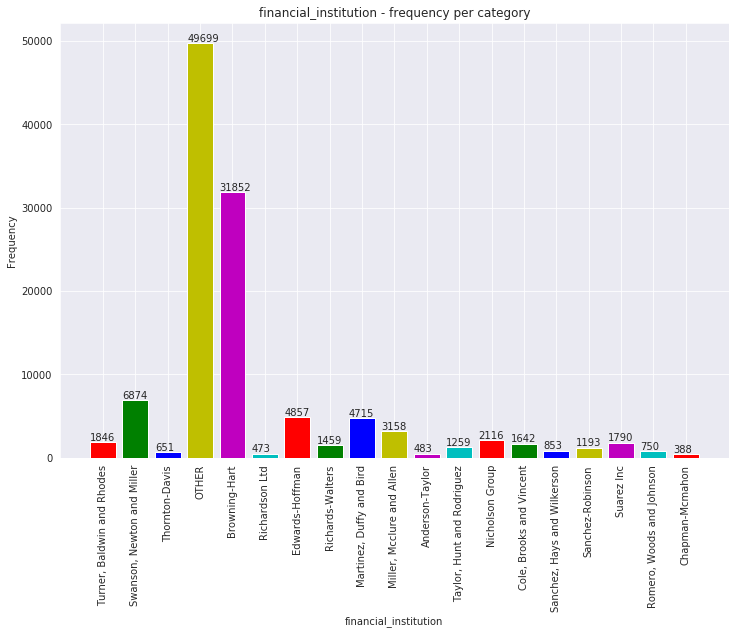

In [10]:
helper.category_freq(train, "financial_institution")

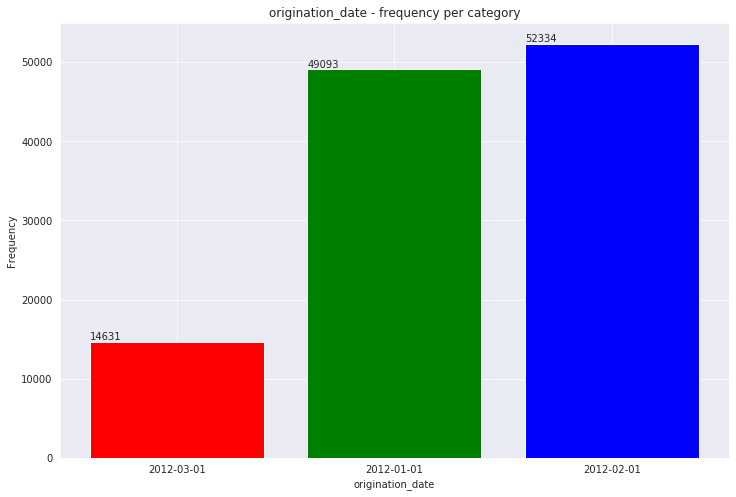

In [11]:
helper.category_freq(train, "origination_date")

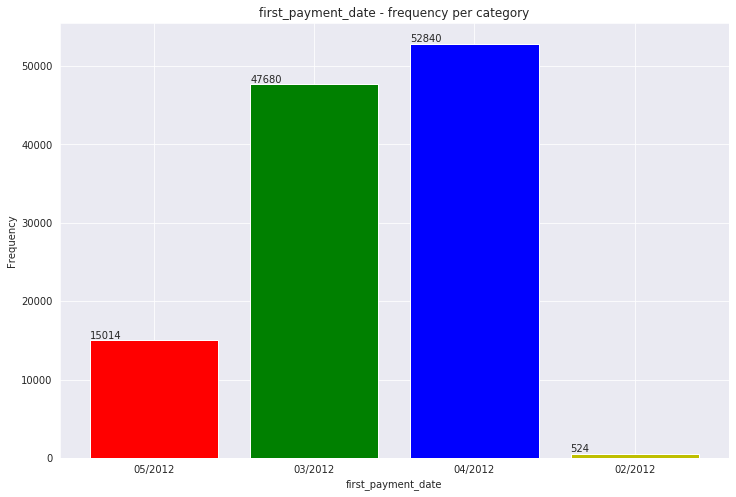

In [12]:
helper.category_freq(train, "first_payment_date")

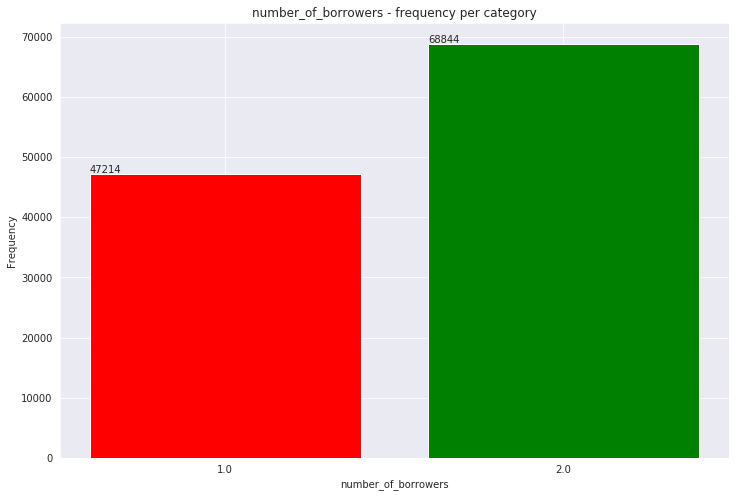

In [13]:
helper.category_freq(train, "number_of_borrowers")

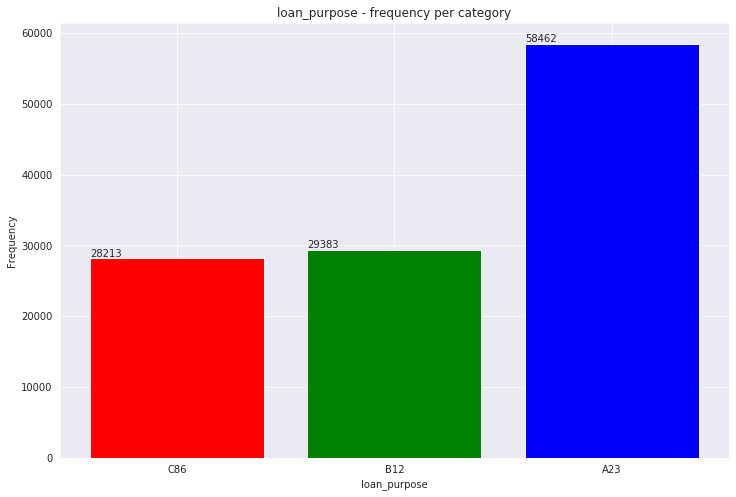

In [14]:
helper.category_freq(train, "loan_purpose")

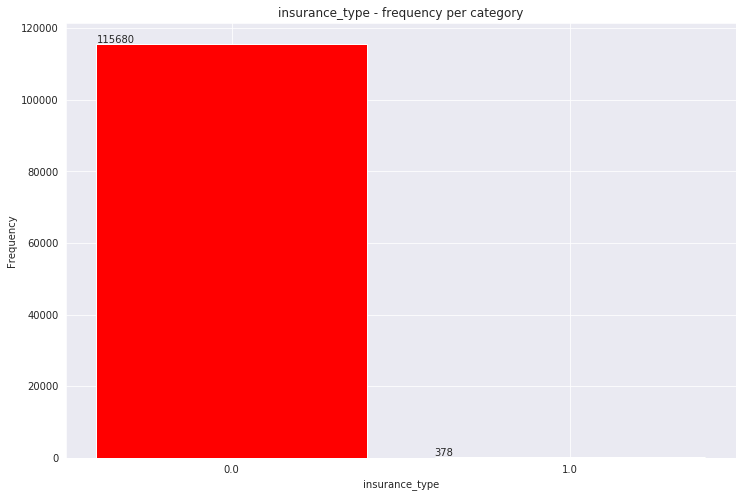

In [15]:
helper.category_freq(train, "insurance_type")

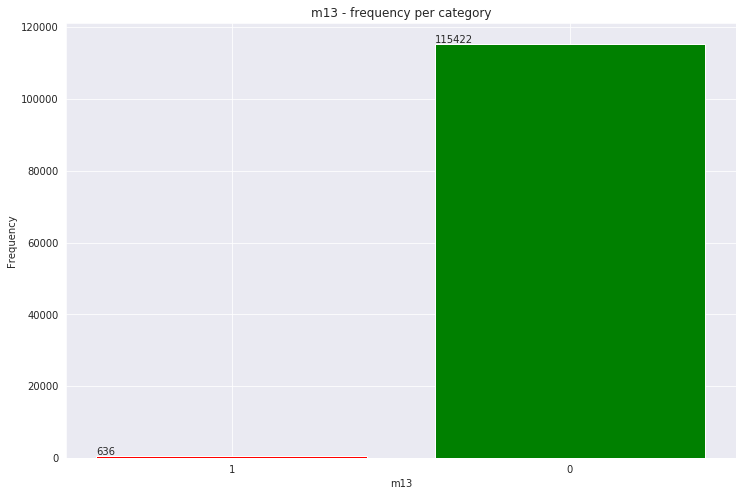

In [16]:
helper.category_freq(train, "m13")

Out of all categorical variables, following are the variables that are very imbalanced:-
1. ``m13`` (target variable)
2. ``insurance_type``
3. ``first_payment_date`` (*the value of 02/2012 is low probably because the payments started in the final days of February. So, we have collected less sample in this month.*)
4. ``financial_institution``
5. ``m1`` to ``m12``, all are highly imbalanced

The biggest challenge with so many variables with imbalanced distribution is that it will become for us to divide the dataset into trainset and validset. There is high probability that we have certain datapoints in our validset, that are not in trainset, leading to flutuations in the loss function. Hence, we might not be able to evaluate the performance of model correctly.

### 2.1.2 Continuous Variables
Rather than opting out plots that gives us the distribution of the variable, we are more interested in checking the central tendency of the variables. For this purpose, we will apply the **Central Limit Theorem**. In probability theory, the central limit theorem establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

If we are able to established that variables in our dataset abide to Central Limit Theorem, we can eliminate the probability of occurance of sampling error.

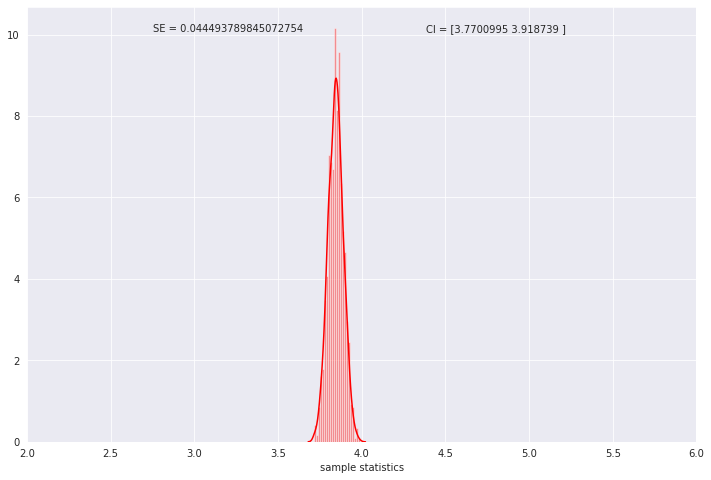

In [17]:
helper.interact_fn(train["interest_rate"], n = 100, xlim = [2, 6])

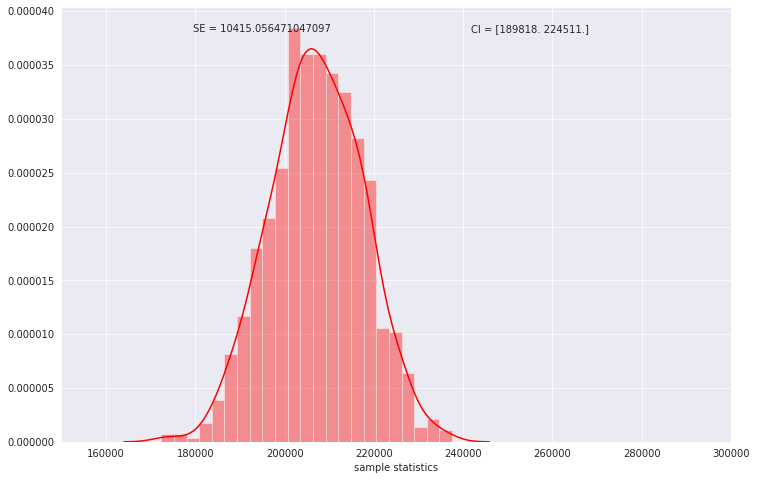

In [18]:
helper.interact_fn(train["unpaid_principal_bal"], n = 100, xlim = [150000, 300000])

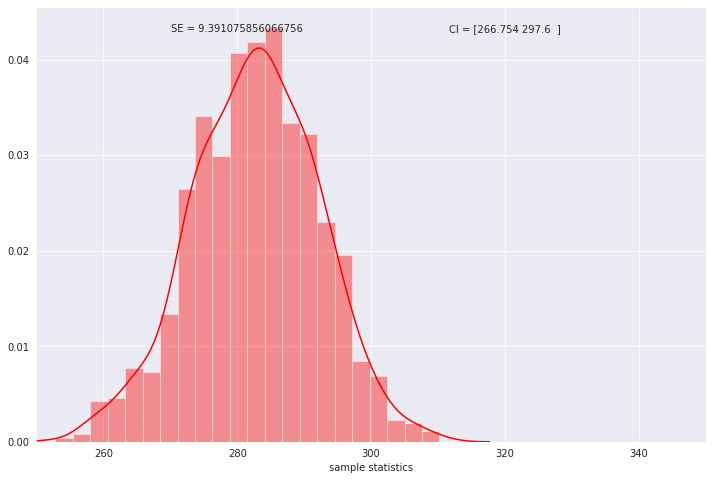

In [19]:
helper.interact_fn(train["loan_term"], n = 100, xlim = [250, 350])

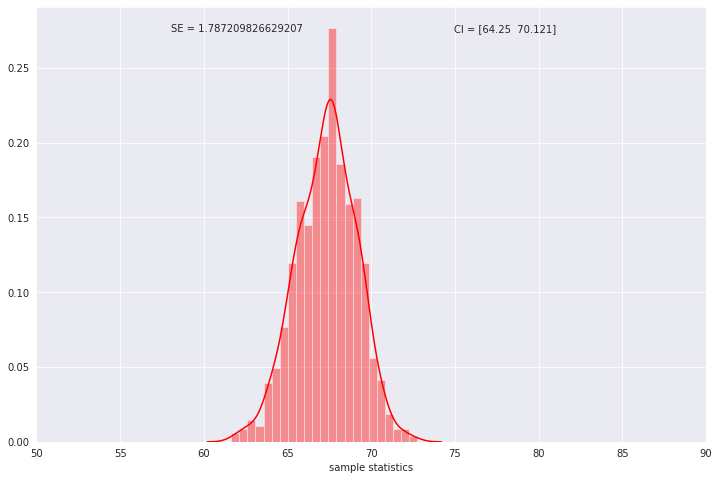

In [20]:
helper.interact_fn(train["loan_to_value"], n = 100, xlim = [50, 90])

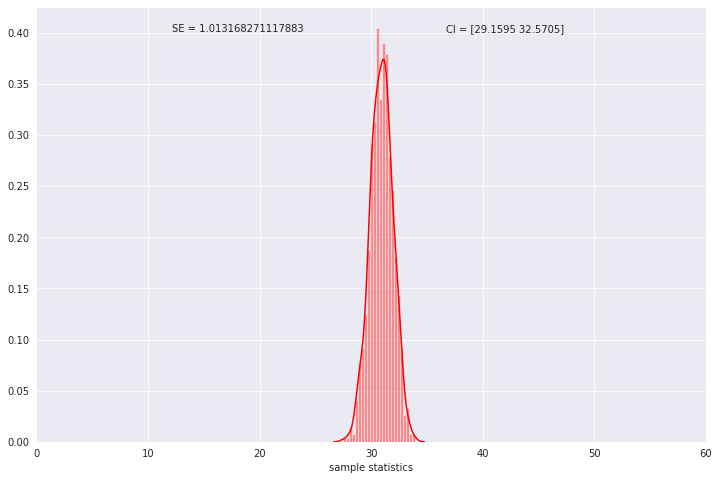

In [21]:
helper.interact_fn(train["debt_to_income_ratio"], n = 100, xlim = [0, 60])

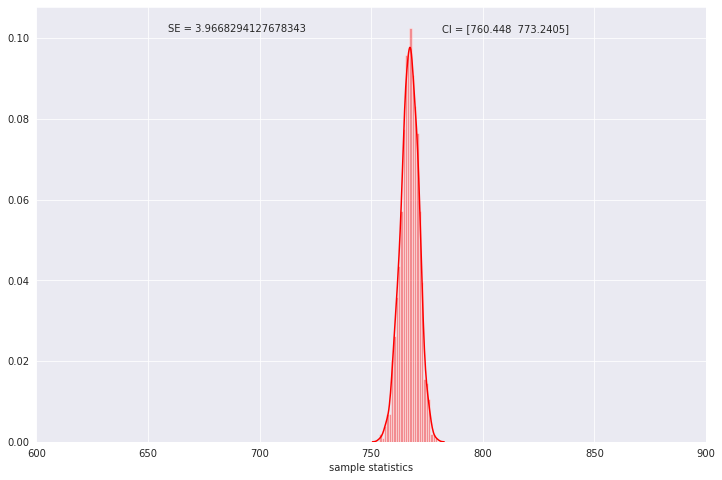

In [28]:
helper.interact_fn(train["borrower_credit_score"], n = 100, xlim = [600, 900])

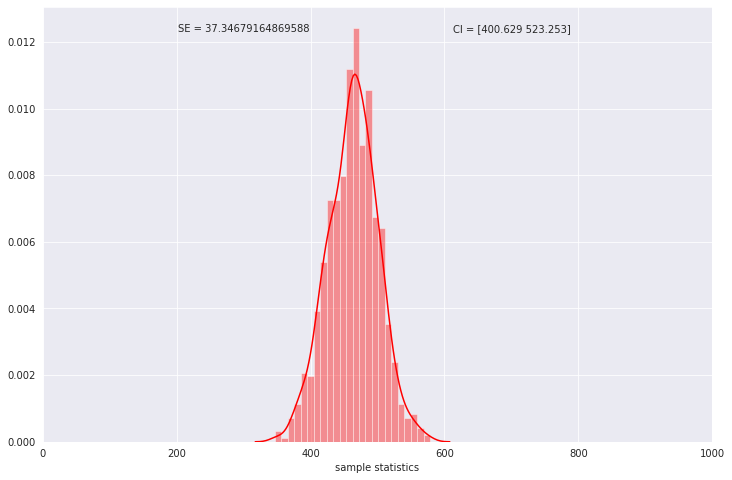

In [23]:
helper.interact_fn(train["co-borrower_credit_score"], n = 100, xlim = [0, 1000])

All of our continuous variables abides to CLT. We can proceed to Multivariate analysis.

## 2.2. Multivariate Analysis

In this section, we will try to understand the ``m13`` better. My primary goal here is to check the effect of diliquency and non-deliquency, when measured with respect to other variables. We will plot Probability distribution for ``m13 == 0`` and ``m13 == 1``. Though, the sample size of ``m13 == 1`` is very small, but that's the point we are most interested in prediction of.

We will start our analysis with probability distributions of m13's classes, with respect to ``interest_rate``.

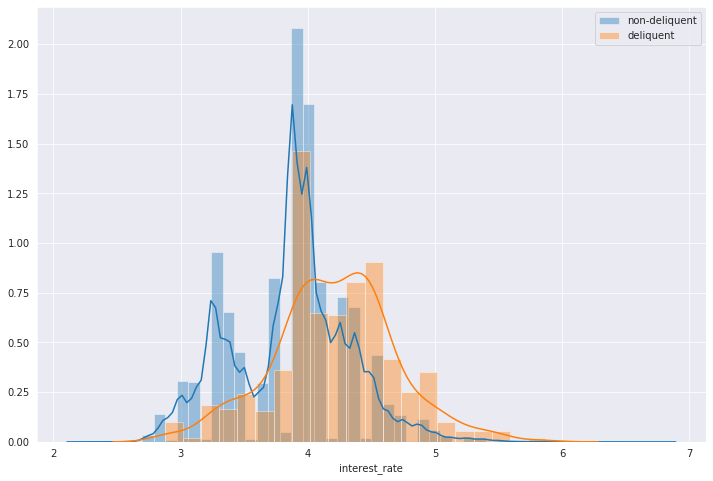

In [53]:
# interest_rate
sns.distplot(train[train["m13"] == 0]["interest_rate"], label = "non-delinquent")
sns.distplot(train[train["m13"] == 1]["interest_rate"], label = "delinquent")
plt.legend()
plt.show()

The loans which are non-delinquent (NDL) in nature, have bimodal distribution, with two peaks around 3.4 and 4.0, while delinquent loans (DL) have (kind of) unimodal peak around 4.5. Also, distribution of DL showcase way more variance.

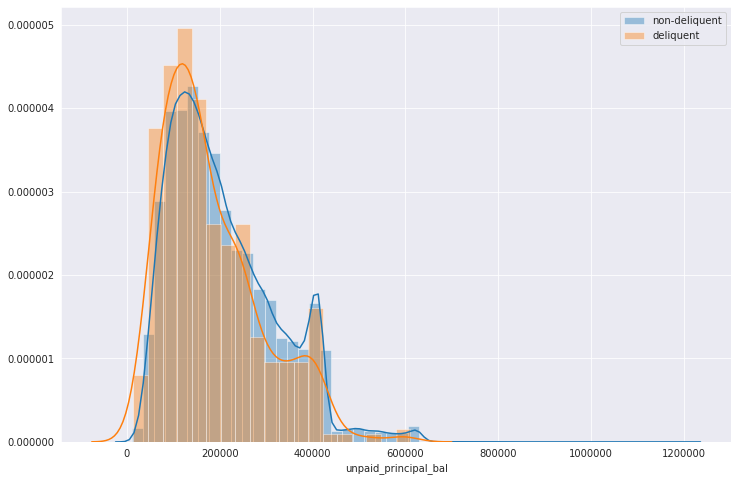

In [54]:
sns.distplot(train[train["m13"] == 0]["unpaid_principal_bal"], label = "non-delinquent")
sns.distplot(train[train["m13"] == 1]["unpaid_principal_bal"], label = "delinquent")
plt.legend()
plt.show()

The effect ``unpaid_principal_bal`` on DLs and NDLs isn't significant with way more area is under uncertain region.

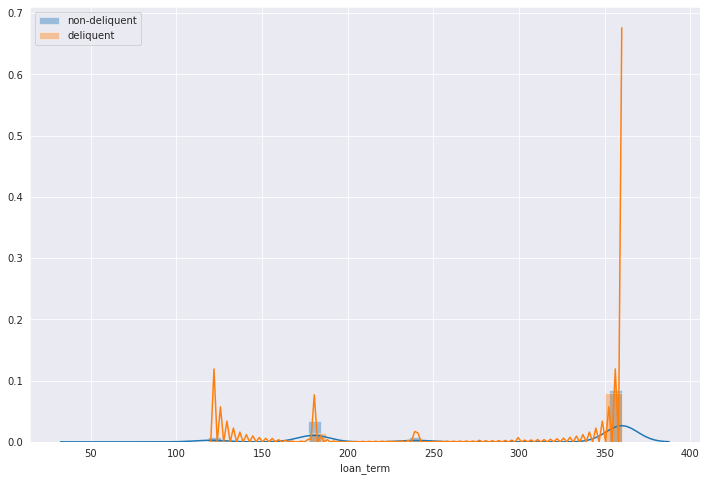

In [55]:
sns.distplot(train[train["m13"] == 0]["loan_term"], label = "non-delinquent")
sns.distplot(train[train["m13"] == 1]["loan_term"], label = "delinquent")
plt.legend()
plt.show()

The probability of DLs when the ``loan_term`` is on the lower side is high, with few peaks around 125-150 and 180-185. This communicates the fact that, when the loan term is small, probability of loan to be delinquent is high.

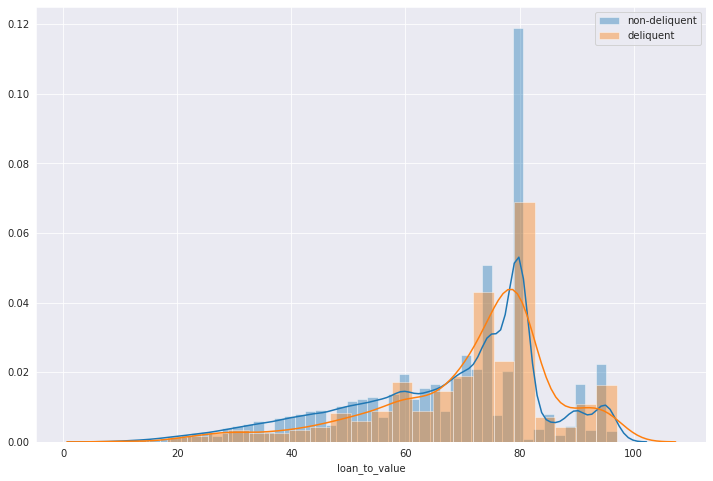

In [56]:
sns.distplot(train[train["m13"] == 0]["loan_to_value"], label = "non-delinquent")
sns.distplot(train[train["m13"] == 1]["loan_to_value"], label = "delinquent")
plt.legend()
plt.show()

Like ``unpaid_principal_bal``, ``loan_to_value`` also have a very weak effect on DLs and NDLs.

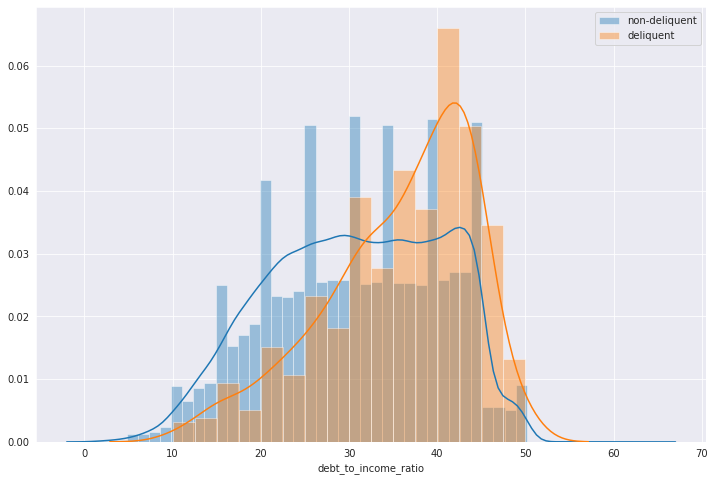

In [57]:
sns.distplot(train[train["m13"] == 0]["debt_to_income_ratio"], label = "non-delinquent")
sns.distplot(train[train["m13"] == 1]["debt_to_income_ratio"], label = "delinquent")
plt.legend()
plt.show()

The ``loan_to_income_ratio`` has a good effect size with NDL having a plateaued distribution while DLs having a peaked distribution.